# Customer Churn Analysis
### Project Description
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

### Dataset Link-  
•	https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv



# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [2]:
df = pd.read_csv("C:\\Users\\suven\\OneDrive\\Desktop\\Internship\\Evaluation Projects\\Third Phase\\Customer Churn Analysis\\Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
# Checking rows and columns of dataset
df.shape

(7043, 21)

- There are 7043 rows and 21 columns in the dataset
- Out of these 21 columns 1 is target variable and rest are features

In [5]:
# Checking names of all the columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- 'Churn' is the target variable and rest all are features

In [6]:
# Checking datatype of each column
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- There are 3 numeric (2 int64 and 1 float64) fields. Rest all are non-numeric(object)
- The categorical i.e. non -numeric fields will be dealt with later

In [7]:
# Checking more info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- There are 7043 rows and 21 columns- another validation with this function
- There are no null/missing values in the dataset
- Theere are 3 numeric and 18 non-numeric fields in the dataset
- The datatype matches with the column name in the dataset


In [8]:
# Checking again if there is any null or missing value
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- This confirms that there is no missing/null value in the dataset

In [9]:
# Checking unique values in columns
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

- Only customerID has all the unique values which looks fine as it is the only identifier in the dataset

In [10]:
# Checking the statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


- The statistical summary of the three numerical columns present in the dataset is shown
- 'SeniorCitizen' should be considered as a categorical column
- 'tenure' is positively skewed as mean > median
- 'MonthlyCharges' is negatively skewed as mean < median

In [3]:
# checking skewness score
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

- very mild skewness present

# EDA

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
7590-VHVEG    0.000142
3791-LGQCY    0.000142
6008-NAIXK    0.000142
5956-YHHRX    0.000142
5365-LLFYV    0.000142
                ...   
9796-MVYXX    0.000142
2637-FKFSY    0.000142
1552-AAGRX    0.000142
4304-TSPVK    0.000142
3186-AJIEK    0.000142
Name: customerID, Length: 7043, dtype: float64


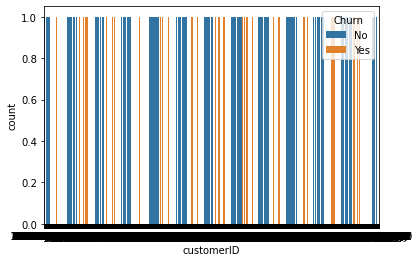

Male      3555
Female    3488
Name: gender, dtype: int64
Male      0.504756
Female    0.495244
Name: gender, dtype: float64


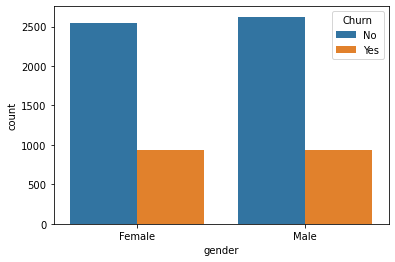

No     3641
Yes    3402
Name: Partner, dtype: int64
No     0.516967
Yes    0.483033
Name: Partner, dtype: float64


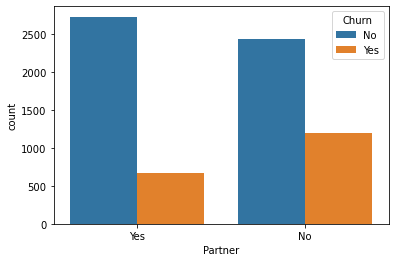

No     4933
Yes    2110
Name: Dependents, dtype: int64
No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64


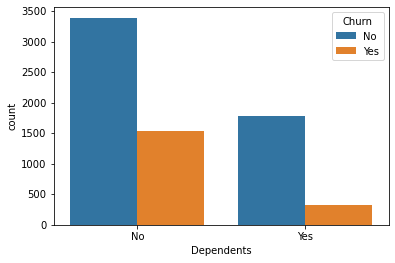

Yes    6361
No      682
Name: PhoneService, dtype: int64
Yes    0.903166
No     0.096834
Name: PhoneService, dtype: float64


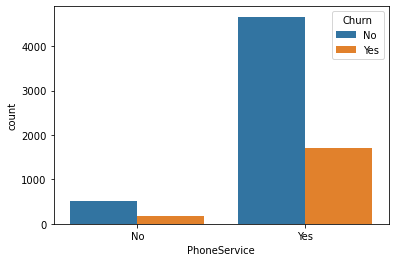

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: MultipleLines, dtype: float64


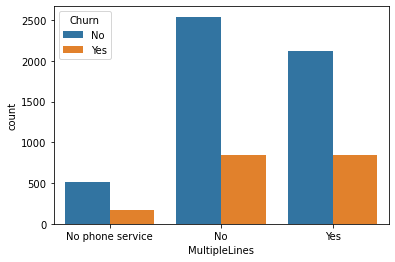

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64


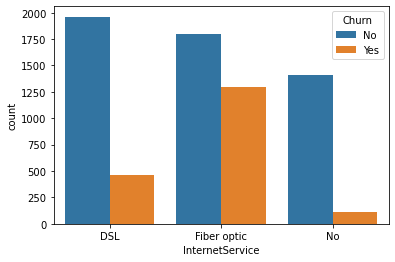

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: OnlineSecurity, dtype: float64


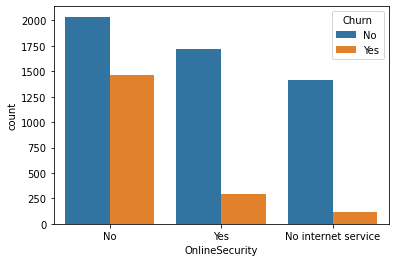

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: OnlineBackup, dtype: float64


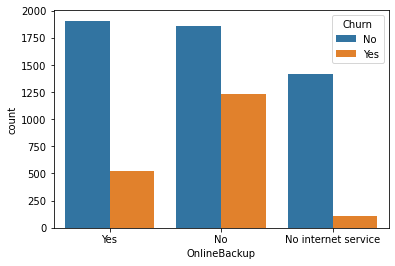

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: DeviceProtection, dtype: float64


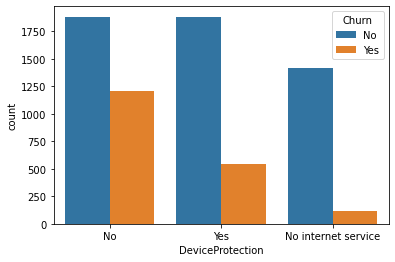

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: TechSupport, dtype: float64


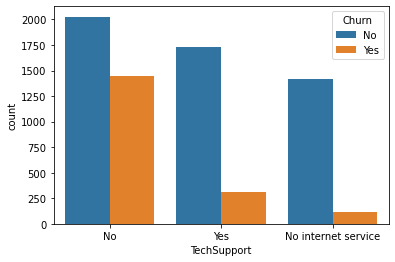

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: StreamingTV, dtype: float64


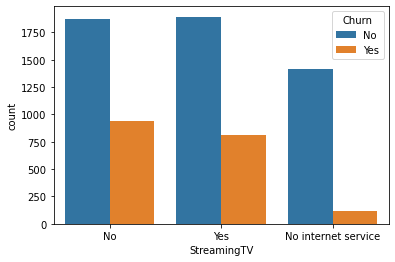

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64
No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: StreamingMovies, dtype: float64


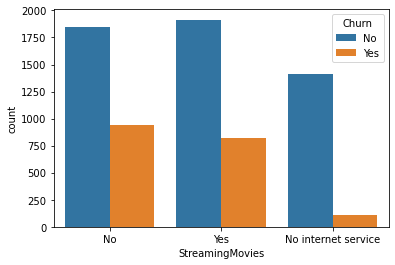

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64


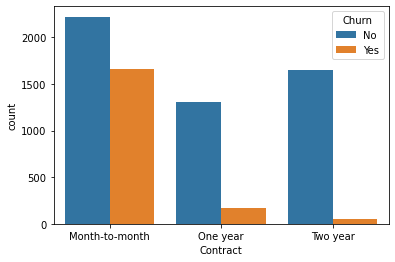

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
Yes    0.592219
No     0.407781
Name: PaperlessBilling, dtype: float64


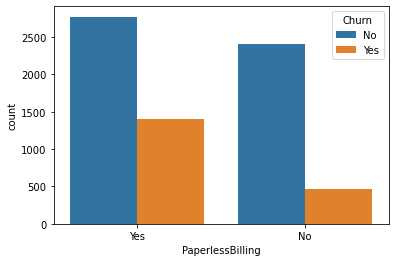

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: PaymentMethod, dtype: float64


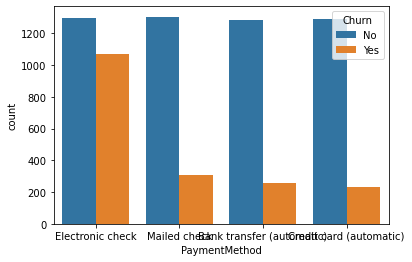

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64
          0.001562
20.2      0.001562
19.75     0.001278
20.05     0.001136
19.9      0.001136
            ...   
6849.4    0.000142
692.35    0.000142
130.15    0.000142
3211.9    0.000142
6844.5    0.000142
Name: TotalCharges, Length: 6531, dtype: float64


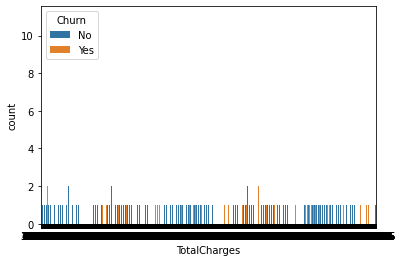

No     5174
Yes    1869
Name: Churn, dtype: int64
No     0.73463
Yes    0.26537
Name: Churn, dtype: float64


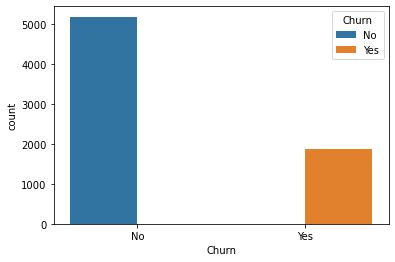

In [12]:
# Let's visualise categorical fields on the countplot
for i in df.columns:
    if df[i].dtypes == 'object':
        sns.countplot(x = df[i], hue = df['Churn'])
        print(df[i].value_counts())
        print(df[i].value_counts(normalize=True))
        plt.show()

- Out of total customerbase, 73% churn while only 27% retain.
- 'customerID' are all unique values
- The number of male and female in the dataset is nearly close. Their churn rate is also very much same.
- The people with no partners is more in the data and they tend to churn more than the ones with the partner.
- 70% of customers have no dependents out of which 83% churn.
- 90% of customers have phoneservice out of 91% churn.
- Customer with no multiple lines is in majority followed by ones with multiple lines and no phone service.Out of these ones with MultipleLines churn the most
- 44% customers have Fiberoptic internet service followed by DSL; 34% and 22% have no internet service. Out of these the ones with Fiberoptic service churn the most; 69%
- 50% customers have no Online security followed by ones with Online security; 29% and 22% have no internet service. Out of these the ones with no online security churn the most.
- 'TotalCharges' should be changed to numeric datatype
- The 'Electronic Check' payment method is in majority ; 33.58% followed by Mailed check; 23% and Bank Transfer 22% and CreditCard 21%. Out of these the Electronic cHECK  churns the most
- 59% of cutomers opt for PaperlessBilling and they churn more; 75%
- The customers in month to month contract are highest in number and also churn the most in comparison to ones in one year or 2 year contracts.
- The ones with no streamingTV churn the most
- The ones with no device protect churn the most

In [4]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')


In [5]:
# Checking if TotalCharges has null values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

'TotalCharges' has 11 missing values. They can be replaced with the mean of the columsn

In [6]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- Missing value in TotalCharges column has been treated

Distribution Plot for  customerID
Distribution Plot for  gender
Distribution Plot for  SeniorCitizen


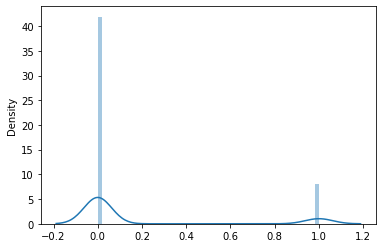

Distribution Plot for  Partner
Distribution Plot for  Dependents
Distribution Plot for  tenure


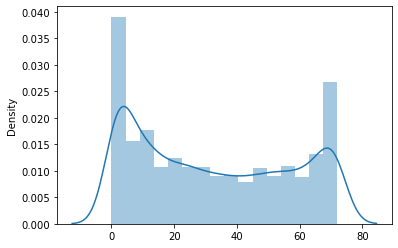

Distribution Plot for  PhoneService
Distribution Plot for  MultipleLines
Distribution Plot for  InternetService
Distribution Plot for  OnlineSecurity
Distribution Plot for  OnlineBackup
Distribution Plot for  DeviceProtection
Distribution Plot for  TechSupport
Distribution Plot for  StreamingTV
Distribution Plot for  StreamingMovies
Distribution Plot for  Contract
Distribution Plot for  PaperlessBilling
Distribution Plot for  PaymentMethod
Distribution Plot for  MonthlyCharges


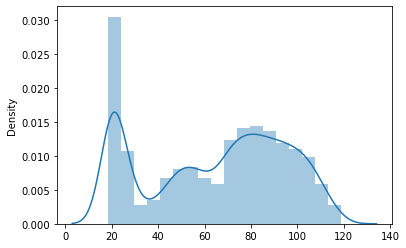

Distribution Plot for  TotalCharges


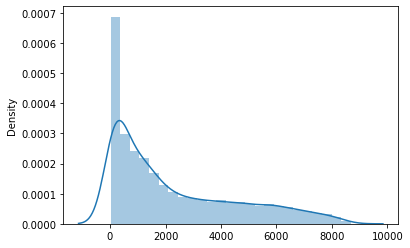

Distribution Plot for  Churn


In [8]:
# Let's visualise numerical fields on the histplot

for i in df.columns:
    print('Distribution Plot for ', i)
    if df[i].dtypes!='object':
        sns.distplot(x=df[i],kde=True)
        plt.show()

- SeniorCitizen should be treated as categorical field
- tenure and MonthlyCharges have very very mild skewness- can be avoided!
- TotalCharges is positively skewed-presence of outliers

# Data Pre-processing

In [ ]:
# Let's check the correlation between the features and target variable.
# But before that let's treat the missing values and use Encoder to convert non-numeric fields to numeric datatype

In [10]:
# Now let us encode the categorical columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = le.fit_transform(df[i])
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


In [11]:
# checking the data type of columns 

df.dtypes

customerID            int32
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

- All are numeric fields now

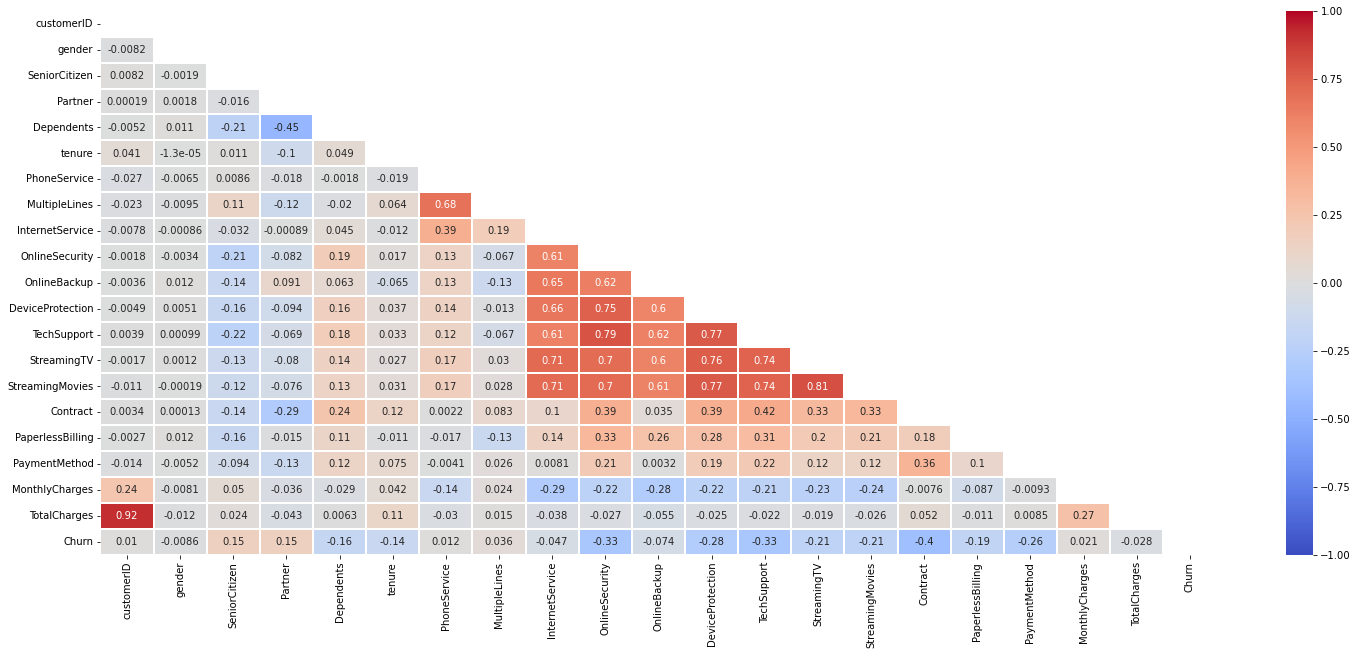

In [20]:
plt.figure(figsize=(25,10))
corr=df.apply(lambda x:pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
ax=sns.heatmap(corr,mask=mask,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,linewidths=.2,cmap='coolwarm',vmin=-1,vmax=1)

In [12]:
# We can drop CustomerID col as it will not contribute to modelling
df= df.drop(['customerID'], axis=1)

In [13]:

# Splitting data into target and features
x = df.drop("Churn",axis=1) # features
y = df["Churn"]             # target variable

In [14]:
# Scaling data

#Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [15]:
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [16]:
# Checking multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.001938,gender
1,1.149759,SeniorCitizen
2,1.461052,Partner
3,1.382351,Dependents
4,7.213411,tenure
5,1.622493,PhoneService
6,1.394323,MultipleLines
7,1.826632,InternetService
8,1.268868,OnlineSecurity
9,1.218713,OnlineBackup


In [17]:
# Dropping column TotalCharges
X = X.drop(["TotalCharges"],axis=1)

In [18]:
# Let's check if multicollinearity still exists
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


- Multicollinearity issue is resolved

In [19]:
# let's check if class is imbalanced
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

- Since the class is imbalanced we will treat it through SMOTE

In [20]:
# Let's balance the target variable using SMOTE()

# Importing Libraries for it 
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,Y=sm.fit_resample(X,y)
Y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

- Now the class looks balanced

## Splitting data for training and testing

In [21]:
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

lg=LogisticRegression()

### Finding best random state

In [22]:
# Finding the random state
maxaccu=0
maxrs=0
for i in range(1,100):
    print("At Random State ", i)
    Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=.20, random_state=i)
    lg.fit(Xtrain,Ytrain)
    predlg=lg.predict(Xtest)
    trainlg=lg.predict(Xtrain)
    acc=accuracy_score(Ytest,predlg)
    accu=accuracy_score(Ytrain,trainlg)
    print('testing accuracy', acc, 'randon state',i)
    print('Training Accuracy', accu, 'random state', i)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
        print('max accuracy', maxaccu , 'max_random_state', i)

At Random State  1
testing accuracy 0.7695652173913043 randon state 1
Training Accuracy 0.7782072964484175 random state 1
max accuracy 0.7695652173913043 max_random_state 1
At Random State  2
testing accuracy 0.7797101449275362 randon state 2
Training Accuracy 0.7742208262865427 random state 2
max accuracy 0.7797101449275362 max_random_state 2
At Random State  3
testing accuracy 0.7806763285024154 randon state 3
Training Accuracy 0.7741000241604252 random state 3
max accuracy 0.7806763285024154 max_random_state 3
At Random State  4
testing accuracy 0.7816425120772947 randon state 4
Training Accuracy 0.7742208262865427 random state 4
max accuracy 0.7816425120772947 max_random_state 4
At Random State  5
testing accuracy 0.778743961352657 randon state 5
Training Accuracy 0.7755496496738342 random state 5
At Random State  6
testing accuracy 0.7705314009661836 randon state 6
Training Accuracy 0.7768784730611259 random state 6
At Random State  7
testing accuracy 0.7584541062801933 randon sta

In [23]:
# Checking for the Max. Accuracy at Random State
print('max accuracy', maxaccu , 'max_random_state', i)

max accuracy 0.7961352657004831 max_random_state 99


In [24]:
#Splitting the data into 80% training and 20% testing

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=99)

In [25]:
print("shape of x_train is", X_train.shape)
print("shape of x_test is", X_test.shape)
print("shape of y_train is", Y_train.shape)
print("shape of y_test is", Y_test.shape)

shape of x_train is (8278, 18)
shape of x_test is (2070, 18)
shape of y_train is (8278,)
shape of y_test is (2070,)


# 1. Logistic Regression

In [26]:
lg = LogisticRegression()
lg.fit(X_train, Y_train)
Y_pred_train_lg = lg.predict(X_train)
Y_pred_test_lg = lg.predict(X_test)
print("Training accuracy is: ", accuracy_score(Y_train, Y_pred_train_lg))
print("Testing accuracy is: ", accuracy_score(Y_test, Y_pred_test_lg))
print(confusion_matrix(Y_test, Y_pred_test_lg))
print(classification_report(Y_test, Y_pred_test_lg))

Training accuracy is:  0.7765160666827736
Testing accuracy is:  0.7714975845410628
[[756 262]
 [211 841]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1018
           1       0.76      0.80      0.78      1052

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



In [27]:
#AUC ROC Curve
# Importing libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

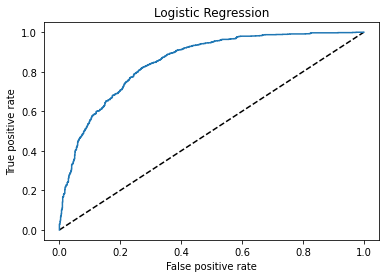

0.771031135380639

In [28]:
#AUC ROC curve for Logistic regression
Y_pred_prob=lg.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Linear Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

auc_score=roc_auc_score(Y_test,lg.predict(X_test))

auc_score

# 2. Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
Y_pred_train_dtc = dtc.predict(X_train)
Y_pred_test_dtc = dtc.predict(X_test)
print("Training accuracy is: ", accuracy_score(Y_train, Y_pred_train_dtc))
print("Testing accuracy is: ", accuracy_score(Y_test, Y_pred_test_dtc))
print(confusion_matrix(Y_test, Y_pred_test_dtc))
print(classification_report(Y_test, Y_pred_test_dtc))

Training accuracy is:  0.9983087702343562
Testing accuracy is:  0.7811594202898551
[[792 226]
 [227 825]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1018
           1       0.78      0.78      0.78      1052

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



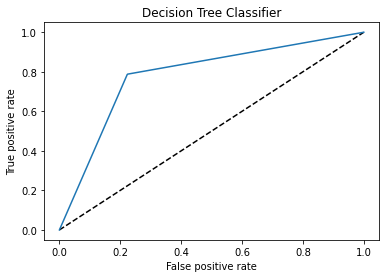

0.7811083015231536

In [30]:
#AUC ROC curve for Decision Tree Classifier
Y_pred_prob=dtc.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()

auc_score=roc_auc_score(Y_test,dtc.predict(X_test))

auc_score

# Random Forest Classifier

In [31]:
# Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred_train_rf = rf.predict(X_train)
Y_pred_test_rf = rf.predict(X_test)
print("Training accuracy is: ", accuracy_score(Y_train, Y_pred_train_rf))
print("Testing accuracy is: ", accuracy_score(Y_test, Y_pred_test_rf))
print(confusion_matrix(Y_test, Y_pred_test_rf))
print(classification_report(Y_test, Y_pred_test_rf))

Training accuracy is:  0.9983087702343562
Testing accuracy is:  0.8536231884057971
[[864 154]
 [149 903]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1018
           1       0.85      0.86      0.86      1052

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



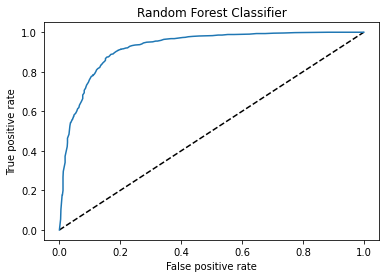

0.8535440026294754

In [32]:
#AUC ROC curve for Random Forest Classifier Classifier
Y_pred_prob=rf.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

auc_score=roc_auc_score(Y_test,rf.predict(X_test))

auc_score

# 4. KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred_train_knn = knn.predict(X_train)
Y_pred_test_knn = knn.predict(X_test)
print("Training accuracy is: ", accuracy_score(Y_train, Y_pred_train_knn))
print("Testing accuracy is: ", accuracy_score(Y_test, Y_pred_test_knn))
print(confusion_matrix(Y_test, Y_pred_test_knn))
print(classification_report(Y_test, Y_pred_test_knn))

Training accuracy is:  0.8483933317226383
Testing accuracy is:  0.7763285024154589
[[679 339]
 [124 928]]
              precision    recall  f1-score   support

           0       0.85      0.67      0.75      1018
           1       0.73      0.88      0.80      1052

    accuracy                           0.78      2070
   macro avg       0.79      0.77      0.77      2070
weighted avg       0.79      0.78      0.77      2070



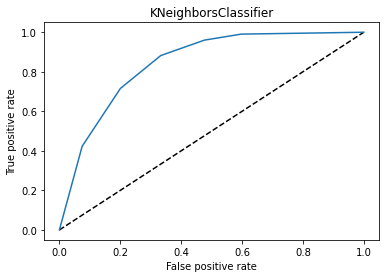

0.7745616918284566

In [34]:
#AUC ROC curve for  KNeighborsClassifier
Y_pred_prob=knn.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,knn.predict(X_test))

auc_score

# 5. GradientBoosting Classifier

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
Y_pred_train_gbc = gbc.predict(X_train)
Y_pred_test_gbc = gbc.predict(X_test)
print("Training accuracy is: ", accuracy_score(Y_train, Y_pred_train_gbc))
print("Testing accuracy is: ", accuracy_score(Y_test, Y_pred_test_gbc))
print(confusion_matrix(Y_test, Y_pred_test_gbc))
print(classification_report(Y_test, Y_pred_test_gbc))

Training accuracy is:  0.8555206571635661
Testing accuracy is:  0.8304347826086956
[[821 197]
 [154 898]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1018
           1       0.82      0.85      0.84      1052

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



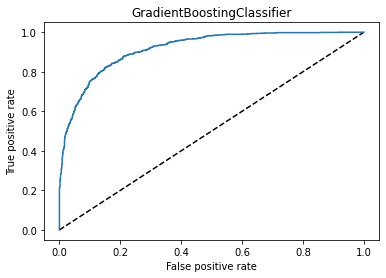

0.8300477339448856

In [36]:
#AUC ROC curve for  GradientBoostingClassifier
Y_pred_prob=gbc.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoostingClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,gbc.predict(X_test))

auc_score

# 6. ADA Boosting Classifier

In [37]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
Y_pred_train_ada = ada.predict(X_train)
Y_pred_test_ada = ada.predict(X_test)
print("Training accuracy is: ", accuracy_score(Y_train, Y_pred_train_ada))
print("Testing accuracy is: ", accuracy_score(Y_test, Y_pred_test_ada))
print(confusion_matrix(Y_test, Y_pred_test_ada))
print(classification_report(Y_test, Y_pred_test_ada))

Training accuracy is:  0.8201256342111621
Testing accuracy is:  0.8043478260869565
[[792 226]
 [179 873]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1018
           1       0.79      0.83      0.81      1052

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



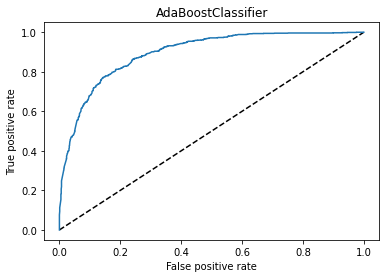

0.8039219897360813

In [38]:
#AUC ROC curve for  AdaBoostClassifier
Y_pred_prob=ada.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoostClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoostClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,ada.predict(X_test))

auc_score

# Cross Validation

In [39]:
from sklearn.model_selection import cross_val_score

# validation accuracy

model=[lg,dtc,rf,knn,gbc,ada]

for i in model:
    for j in range(2,10):
        print('taking cv =', j)
        cr_score=cross_val_score(i, X, Y, cv=j)
        print('Cross validation score for ' , i ,' is', cr_score)
        print('Mean of Cross Val. score is ', cr_score.mean())

taking cv = 2
Cross validation score for  LogisticRegression()  is [0.76285273 0.77908775]
Mean of Cross Val. score is  0.7709702357943564
taking cv = 3
Cross validation score for  LogisticRegression()  is [0.76463768 0.76601914 0.7924036 ]
Mean of Cross Val. score is  0.7743534707952877
taking cv = 4
Cross validation score for  LogisticRegression()  is [0.76923077 0.75995361 0.76691148 0.79706223]
Mean of Cross Val. score is  0.773289524545806
taking cv = 5
Cross validation score for  LogisticRegression()  is [0.77004831 0.75603865 0.76086957 0.7858869  0.79748671]
Mean of Cross Val. score is  0.7740660264357914
taking cv = 6
Cross validation score for  LogisticRegression()  is [0.76985507 0.75130435 0.76927536 0.76057971 0.78770302 0.80336427]
Mean of Cross Val. score is  0.7736802963560757
taking cv = 7
Cross validation score for  LogisticRegression()  is [0.775524   0.75726842 0.76048714 0.76184032 0.77469553 0.78822733
 0.80717185]
Mean of Cross Val. score is  0.7750306599239014
t

The Random Forest Classifier is giving the accuracy 85.22% with cross val score as 84.64% at fold 8 compared with all other classifiers
Hence selecting the RandomForestClassifier giving almost 85% model accuracy.

# Hyperparameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV

#Creating parameter list to be passed in GridSearchCV
parameters = {
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt','log2'],
 'n_estimators': [100, 200, 300]
    
} 

GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=7,
                scoring='accuracy')

In [42]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [43]:
# Checking score with best parameter
final_model=RandomForestClassifier(max_depth=40,max_features='log2',n_estimators=200)
final_model.fit(X_train,Y_train)
predfinal=final_model.predict(X_test)
print('Final Accuracy is with Random Forest Classifier = ',accuracy_score(Y_test,predfinal))

Final Accuracy is with Random Forest Classifier =  0.8594202898550725


<function matplotlib.pyplot.show(close=None, block=None)>

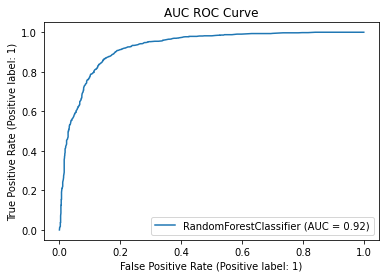

In [44]:
#AUC ROC of Best Estimator
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,X_test,Y_test)
plt.title('AUC ROC Curve')
plt.show

# Saving the model

In [46]:
import joblib
joblib.dump(GCV.best_estimator_, "Customer churn analysis.pkl")

['Customer churn analysis.pkl']

In [50]:
# Conclusion
a=np.array(Y_test)
predicted=np.array(predfinal)
df_con=pd.DataFrame({'Original':a,'Predicted':predfinal}, index=range(len(a)))
df_con

,Original,Predicted
0,1,1
1,1,1
2,1,0
3,0,1
4,0,0
...,...,...
2065,0,0
2066,0,0
2067,0,0
2068,1,1
